# Liner Regression Practical implementation

#  Step1- Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step2-Data Collection

In [2]:
boston_data=pd.read_csv("Housing.csv")
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Step3-Wrangling Data

In [3]:
### independent feature 
X=boston_data.iloc[:,:13]
##dependent feature
y=boston_data["medv"]

# Step4-Data Analysis


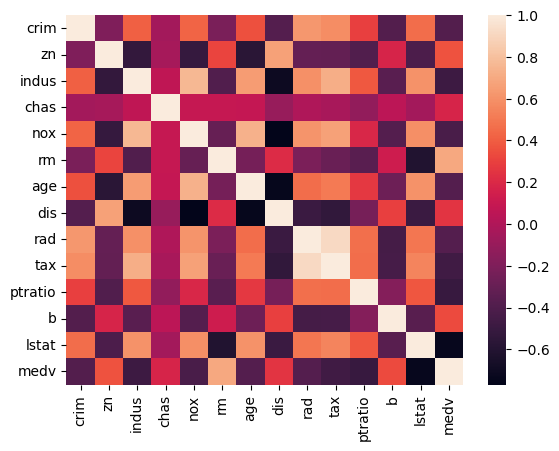

In [4]:
# Find correlation between all available columns
corr = boston_data.corr()
# Find correlated data columns using heatmaps
sns.heatmap(corr)
plt.show()

# Columns which are having correlation +ve and above 0.9 are highly correlated to each other
# We can drop any of them since it will not impact on output

#Right now I am not dropping any column and trying to predict the output with all input data

# Step5- Split train test Data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


# Step6-Standiration the dataset

In [7]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [9]:
X_test=scaler.transform(X_test)

# Step7- Model instantiation and train the model

In [10]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

# Step8-check Cross Validation

In [11]:

##cross validation
from sklearn.model_selection import cross_val_score

In [12]:
mse=cross_val_score(regression,X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [13]:
##mean
np.mean(mse)

-25.550660791660796

# Step9-Test the Data

In [14]:
##prediction
reg_predict=regression.predict(X_test)

In [15]:
reg_predict

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

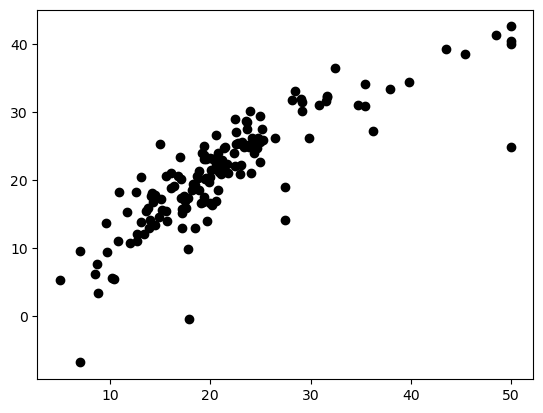

In [16]:
plt.scatter(y_test, reg_predict, color='black')
plt.show()

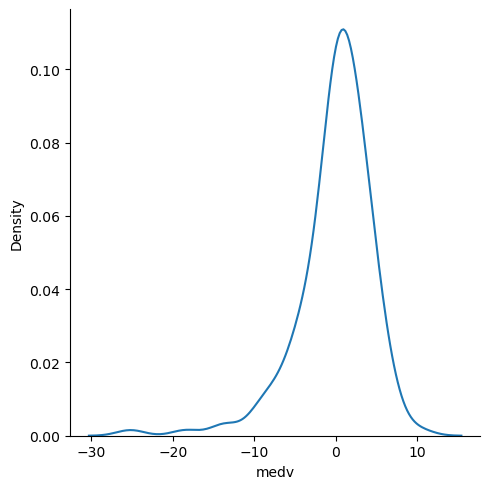

In [17]:

sns.displot(reg_predict-y_test,kind="kde")

In [18]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": reg_predict, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
173         28.648960           23.6
274         36.495014           32.4
491         15.411193           13.6
72          25.403213           22.8
452         18.855280           16.1
..                ...            ...
441         17.403672           17.1
23          13.385941           14.5
225         39.983425           50.0
433         16.682863           14.3
447         18.285618           12.6

[152 rows x 2 columns]


# Check r2_score

In [19]:
from sklearn.metrics  import r2_score


In [20]:
score=r2_score(reg_predict,y_test)

In [21]:
score

0.6693702691495589